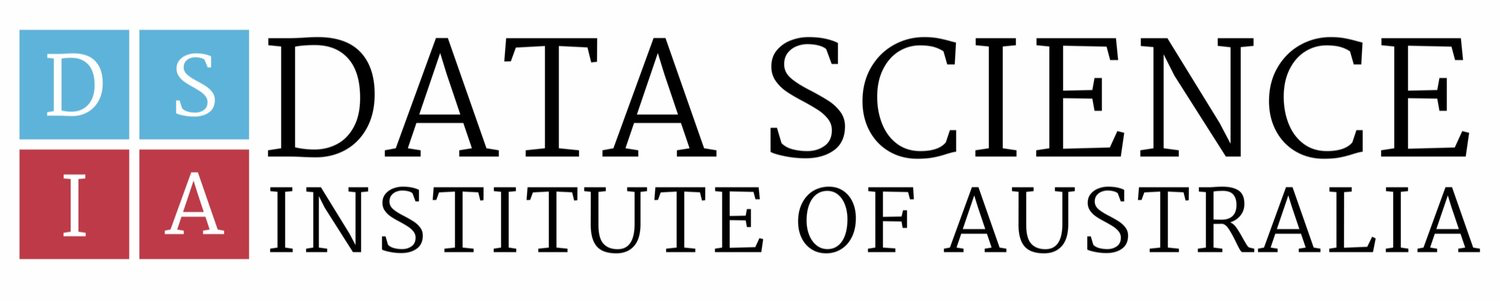

# Data Science and AI
## Lab 6.4: DBSCAN

INSTRUCTIONS:

- Run the cells
- Observe and understand the results
- Answer the questions

Based on the **SciKit-Learn** Documentation "[**Demo of DBSCAN clustering algorithm**](http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html)", and the article "[**Density-based clustering algorithm (DBSCAN) and Implementation**](http://madhukaudantha.blogspot.com/2015/04/density-based-clustering-algorithm.html)" posted 8th April 2015 by **Madhuka Udantha**

# Density-based clustering algorithm (DBSCAN) and Implementation
Density-based spatial clustering of applications with noise (DBSCAN) is a density-based clustering algorithm. It gives a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbours), marking as outliers points that lie alone in low-density regions. In 2014, the algorithm was awarded the test of time award at the leading data mining conference, KDD.

### Density Definition

- ε-Neighbourhood (`eps`): Objects within a radius of ε from an object
- High density: ε-Neighbourhood of an object contains at least `minPts` of objects

$$N_{\epsilon}(p): \{q | d(p, q) \gt \epsilon\}$$

### Core, Border & Outlier
A point is a core point if it has more than a specified number of points (`minPts`) within `eps`. These are points that are at the interior of a cluster.

A border point has fewer than `minPts` within `eps`, but is in the neighbourhood of a core point.

### Density-reachability

Reachability is not a symmetric relation since, by definition, no point may be reachable from a non-core point, regardless of distance. Two points $p$ and $q$ are density-connected if there is a point o such that both $p$ and $q$ are density-reachable from $o$. Density-connectedness is symmetric.

Let check with example

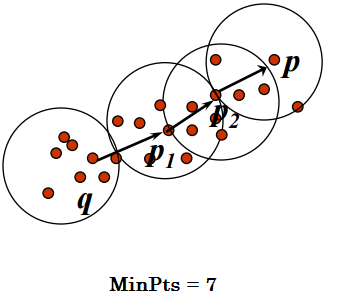

- A point $p$ is directly density-reachable from $p_2$
- $p_2$ is directly density-reachable from $p_1$
- $p_1$ is directly density-reachable from $q$
- $p \leftarrow p_2 \leftarrow p_1 \leftarrow q$ form a chain

$p$ is (indirectly) density-reachable from $q$  
$q$ is not density-reachable from $p$

### Algorithm

    DBSCAN(D, eps, MinPts)
       C = 0
       for each unvisited point P in dataset D
          mark P as visited
          NeighbourPts = regionQuery(P, eps)
          if sizeof(NeighbourPts) < MinPts
             mark P as NOISE
          else
             C = next cluster
             expandCluster(P, NeighbourPts, C, eps, MinPts)

    expandCluster(P, NeighbourPts, C, eps, MinPts)
       add P to cluster C
       for each point P' in NeighbourPts 
          if P' is not visited
             mark P' as visited
             NeighbourPts' = regionQuery(P', eps)
             if sizeof(NeighbourPts') >= MinPts
                NeighbourPts = NeighbourPts joined with NeighbourPts'
          if P' is not yet member of any cluster
             add P' to cluster C

    regionQuery(P, eps)
       return all points within P's eps-neighbourhood (including P)

### Let is Implement the Algorithm.

I will be using `sklearn.cluster.DBSCAN`. Perform DBSCAN clustering from vector array or distance matrix. I will be using my sample data that was generated from Gaussian blobs.

    from sklearn.cluster import DBSCAN
    db = DBSCAN(eps = 0.3, min_samples = 10).fit(X)

In [1]:
# Import Libraries

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline
import matplotlib.pyplot as plt

### DBSCAN
#### Parameters
- `eps`: The maximum distance between two samples for them to be considered as in the same neighbourhood `(float, optional)`
- `min_samples`: The number of samples in a neighbourhood for a point to be considered as a core point. This includes the point itself. `(int, optional)`
- `metric`: The metric to use when calculating distance between instances in a feature array. `(string, or callable)`
- `algorithm`: The algorithm to be used by the NearestNeighbours module to compute point wise distances and find nearest neighbours. `({'auto', 'ball_tree', 'kd_tree', 'brute'}, optional)`
- `leaf_size`: Leaf size passed to BallTree or cKDTree. This can affect the speed of the construction and query, as well as the memory required. `(int, optional, default=30)`

#### Attributes
- `core_sample_indices_`: Indexes of core samples. `array, shape = [n_core_samples])`
- `components_`: Copy of each core sample found by training. `(array, shape = [n_core_samples, n_features])`
- `labels_`: Cluster labels for each point in the dataset given to `fit()`. Noisy samples are given the label `-1`. `(array, shape = [n_samples])`

#### Memory complexity
- Memory complexity to $O(nd)$ where $d$ is the average number of neighbours, while original DBSCAN had memory complexity $O(n)$.

#### Methods
- `fit(X[, y, sample_weight])`: Perform DBSCAN clustering from features or distance matrix.
- `fit_predict(X[, y, sample_weight])`: Performs clustering on `X` and returns cluster labels.
- `get_params([deep])`: Get parameters for this estimator.
- `set_params(**params)`: Set the parameters of this estimator.

In [2]:
# generating sample data
centres = [[5, 5], [0, 0], [1, 5], [5, -1]]
X, labels_true = make_blobs(n_samples=500,
                            n_features=5,
                            centers=centres,
                            cluster_std=0.9,
                            center_box=(1, 10.0),
                            shuffle=True,
                            random_state=0)

In [3]:
# Compute DBSCAN
db = DBSCAN(eps = 0.5, min_samples = 10).fit(X)

# zeros_like: Return an array of zeros with the same shape
# and type as a given array., dtype will overrides
# the data type of the result.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

# core_sample_indices_: Attributes and it is index of
# core samples (array, shape = [n_core_samples])
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [4]:
# print results
print('Estimated number of clusters: %d' % n_clusters_)
hs = metrics.homogeneity_score(labels_true, labels)
cs = metrics.completeness_score(labels_true, labels)
vms = metrics.v_measure_score(labels_true, labels)
ars = metrics.adjusted_rand_score(labels_true, labels)
amis = metrics.adjusted_mutual_info_score(labels_true,
                                         labels,
                                         average_method='arithmetic')
ss = metrics.silhouette_score(X, labels)

print('Homogeneity                 : %0.3f' % hs)
print('Completeness                : %0.3f' % cs)
print('V-measure                   : %0.3f' % vms)
print('Adjusted Rand Index         : %0.3f' % ars)
print('Adjusted Mutual Information : %0.3f' % amis)
print('Silhouette Coefficient      : %0.3f' % ss)

Estimated number of clusters: 5
Homogeneity                 : 0.748
Completeness                : 0.625
V-measure                   : 0.681
Adjusted Rand Index         : 0.570
Adjusted Mutual Information : 0.678
Silhouette Coefficient      : 0.303


### Results for DBSCAN is compared by following
- **Homogeneity**: A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
- **Completeness**: A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
- **V-measure**: The V-measure is the harmonic mean between homogeneity and completeness.  

$$v = 2 \cdot {homogeneity \cdot completeness \over homogeneity + completeness}$$
  
- **The Rand Index**: The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are Rand index adjusted for chance.assigned in the same or different clusters in the predicted and true clusterings.
- **Adjusted Mutual Information (AMI)**: It is an adjustment of the Mutual Information (MI) score to account for chance. It accounts for the fact that the MI is generally higher for two clusterings with a larger number of clusters, regardless of whether there is actually more information shared.
- **Silhouette Coefficient**: The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

### Charting for DBSCAN
Here is simple chart for to show DBSCAN results noised data will be in black and other all Cluster point have their colours.

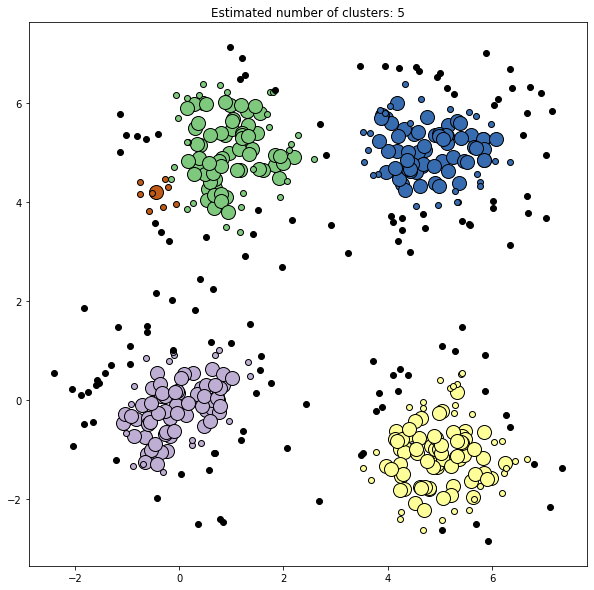

In [5]:
# Drawing chart
# Black removed and is used for noise instead.
fig = plt.figure(figsize = (10, 10))
unique_labels = set(labels)
colors = plt.cm.Accent(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # core points are bigger
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o',
             markerfacecolor=col,
             markeredgecolor='k',
             markersize=14)

    # boarder points are smaller
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o',
             markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()